In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Import required libraries

In [70]:
df = pd.read_csv('./datafile/Mall_Customers.csv')
#Read data file

In [71]:
df.head(10)
#Display first 10 rows of the data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [72]:
df.describe()
#Display summary statistics of the data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Encode categorial variables:
Gender - Male, Female

In [73]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [74]:
# Features for clustering
x = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Now, Scale the data

In [75]:
# Scale data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

For 2D visuals, 
Using PCA


In [76]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

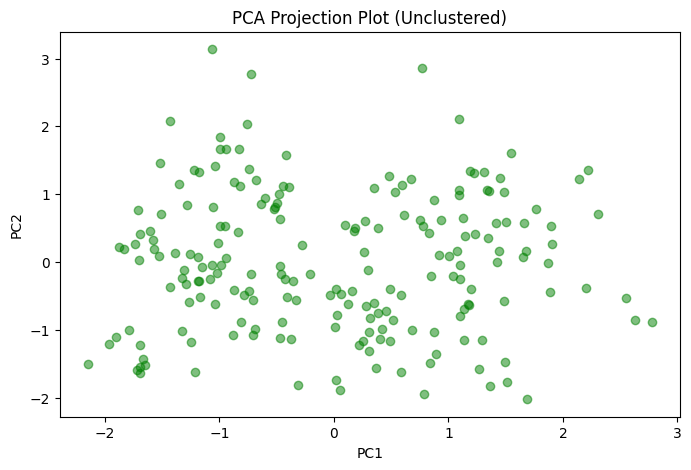

In [77]:
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.5, c = "green")
plt.title("PCA Projection Plot (Unclustered)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Now, lets fit the K-Means and assign cluster labels:

In [78]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(x_scaled)
df['Cluster'] = labels

Using Elbow Method to find the optimal value of K.

C:\Users\Safal\AppData\Local\Temp\ipykernel_14360\2127515146.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_range, inertia, 'bo-',c = "green")


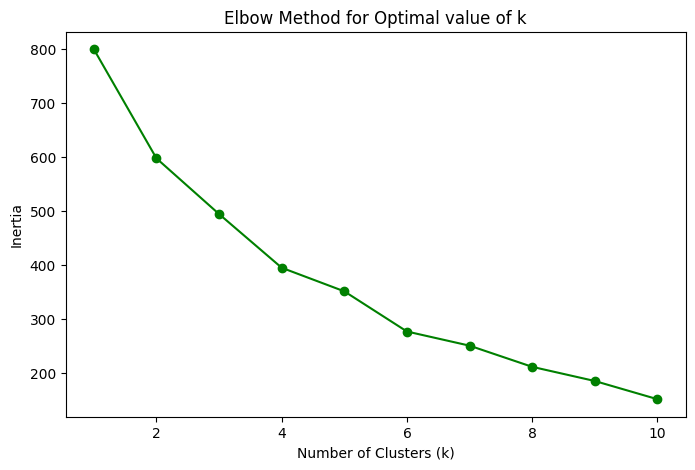

In [79]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-',c = "green")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal value of k")
plt.show()

Visualize the clusters through the help of color-coding.

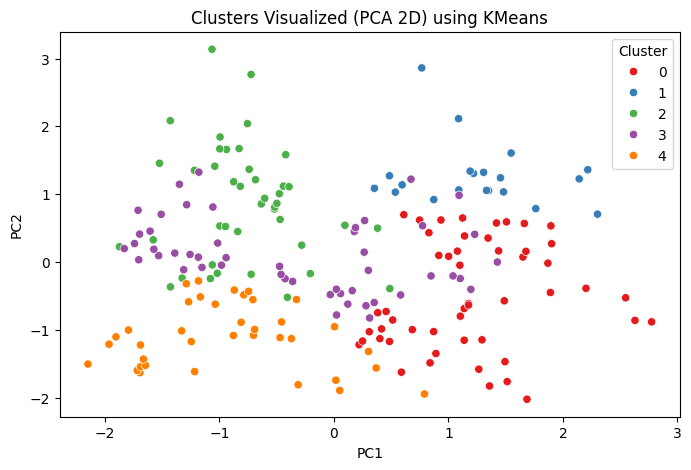

In [80]:
# Using PCA-reduced data for 2D visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=labels, palette='Set1')
plt.title("Clusters Visualized (PCA 2D) using KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

Lets evaluate the clustering using the Silhouette Score.

In [81]:
sil_score = silhouette_score(x_scaled, labels)
print(f"Silhouette Score obtained from the  above clustering: {sil_score:.5f}")

Silhouette Score obtained from the  above clustering: 0.27191
